In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import statsmodels.api as sm

In [ ]:

cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

In [ ]:
data= pd.read_csv("/content/Check out this file covid_19_indiaasseignment.csv",index_col="Sno")
data.head()


,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
data.describe()


,Cured,Deaths,Confirmed
count,1.811000e+04,18110.000000,1.811000e+04
mean,2.786375e+05,4052.402264,3.010314e+05
std,6.148909e+05,10919.076411,6.561489e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,3.360250e+03,32.000000,4.376750e+03
50%,3.336400e+04,588.000000,3.977350e+04
75%,2.788698e+05,3643.750000,3.001498e+05
max,6.159676e+06,134201.000000,6.363442e+06


In [ ]:
data.tail()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


State with most number of cases reported '\


In [ ]:
data.loc[data["Confirmed"]==data["Confirmed"].max()]

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
18095,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442


In [ ]:
data.shape


(18110, 8)

In [ ]:
data.isnull().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [ ]:

datan=data.groupby("Date").sum().reset_index()
datan

,Date,Cured,Deaths,Confirmed
0,2020-01-30,0,0,1
1,2020-01-31,0,0,1
2,2020-02-01,0,0,2
3,2020-02-02,0,0,3
4,2020-02-03,0,0,3
...,...,...,...,...
555,2021-08-07,31055861,427371,31895385
556,2021-08-08,31099771,427862,31934455
557,2021-08-09,31139457,428309,31969954
558,2021-08-10,31180968,428682,31998158


In [ ]:
cm=datan.melt(id_vars='Date',value_vars=["Confirmed","Deaths"],var_name='trouble',value_name='count')


In [ ]:
viz_ind_cov19=datan
viz_ind_cov19["Active_cases"]=datan["Confirmed"]-datan["Deaths"]-datan['Cured']
viz_ind_cov19

,Date,Cured,Deaths,Confirmed,Active_cases
0,2020-01-30,0,0,1,1
1,2020-01-31,0,0,1,1
2,2020-02-01,0,0,2,2
3,2020-02-02,0,0,3,3
4,2020-02-03,0,0,3,3
...,...,...,...,...,...
555,2021-08-07,31055861,427371,31895385,412153
556,2021-08-08,31099771,427862,31934455,406822
557,2021-08-09,31139457,428309,31969954,402188
558,2021-08-10,31180968,428682,31998158,388508


In [ ]:

fig=px.line(cm,x='Date',y='count',color='trouble',log_y=True,title="number of deaths / confirmed cases")
fig.update_layout(legend=dict(orientation="h", y=1, x=0,xanchor="left", yanchor="top"),  margin=dict(t=80,l=0,r=0,b=0))

## in the above graph it is clear that in the months of (march2020-july2020) there is an exponential rise in both number of deaths and confirmed cases From the month of september

In [ ]:
data.head()
print(data['State/UnionTerritory'].nunique())
data['State/UnionTerritory'].unique()


46


array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

# Covid-19 spread in various states of india

In [ ]:
data_n=data.replace(to_replace=['Telangana','Bihar****','Madhya Pradesh***','Himanchal Pradesh','Karanataka','Maharashtra***'],value=['Telengana','Bihar','Madhya Pradesh','Himachal Pradesh','Karnataka','Maharashtra'])
data_n['State/UnionTerritory'].unique()
infect=data_n.groupby('State/UnionTerritory').sum()
infect.drop(["Cases being reassigned to states","Dadra and Nagar Haveli and Daman and Diu"])


,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Andaman and Nicobar Islands,1848286,27136,1938498
Andhra Pradesh,370426530,2939367,392432753
Arunachal Pradesh,6588149,26799,7176907
Assam,92678680,638323,99837011
Bihar,126525370,1112347,133662075
Chandigarh,10117035,147694,10858627
Chhattisgarh,151609364,2063920,163776262
Dadra and Nagar Haveli,20352,8,20722
Daman & Diu,0,0,2


In [ ]:
infect.style.background_gradient(cmap='Reds')


,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Andaman and Nicobar Islands,1848286,27136,1938498
Andhra Pradesh,370426530,2939367,392432753
Arunachal Pradesh,6588149,26799,7176907
Assam,92678680,638323,99837011
Bihar,126525370,1112347,133662075
Cases being reassigned to states,0,0,345565
Chandigarh,10117035,147694,10858627
Chhattisgarh,151609364,2063920,163776262
Dadra and Nagar Haveli,20352,8,20722


In [ ]:
data_n

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
18106,2021-08-11,8:00 AM,Telengana,-,-,638410,3831,650353
18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462


## Exponential model of covid-19 in india based on confirmed cases

In [ ]:
x2=pd.DataFrame(data_n.groupby('Date')['Confirmed'].sum())
x2['log_confirmed']=np.log(x2.Confirmed)
x2['date']=np.arange(0,560,1)
x2

,Confirmed,log_confirmed,date
Date,,,
2020-01-30,1,0.000000,0
2020-01-31,1,0.000000,1
2020-02-01,2,0.693147,2
2020-02-02,3,1.098612,3
2020-02-03,3,1.098612,4
...,...,...,...
2021-08-07,31895385,17.277972,555
2021-08-08,31934455,17.279196,556
2021-08-09,31969954,17.280307,557


In [ ]:
x=pd.DataFrame(x2.date).reset_index()
x.drop(['Date'],axis=1,inplace=True)

x=sm.add_constant(x)


In [ ]:
y=pd.DataFrame(x2.log_confirmed).reset_index()
y.drop(["Date"],axis=1,inplace=True)
y

,log_confirmed
0,0.000000
1,0.000000
2,0.693147
3,1.098612
4,1.098612
...,...
555,17.277972
556,17.279196
557,17.280307
558,17.281189


In [ ]:
exp=sm.OLS(y,x)
exp_n=exp.fit()
print(exp_n.summary())


                            OLS Regression Results                            
Dep. Variable:          log_confirmed   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1151.
Date:                Sat, 04 Sep 2021   Prob (F-statistic):          9.29e-138
Time:                        07:10:50   Log-Likelihood:                -1314.8
No. Observations:                 560   AIC:                             2634.
Df Residuals:                     558   BIC:                             2642.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5128      0.214     35.097      0.0

In [ ]:
print(exp_n.params)


const    7.512812
date     0.022495
dtype: float64


In [ ]:
growth_rate=np.exp(exp_n.params.date)
initial=np.exp(exp_n.params.const)
initial


1831.3562315604331

Text(0.5, 1.0, 'Exponential model for covid India confirmed cases')

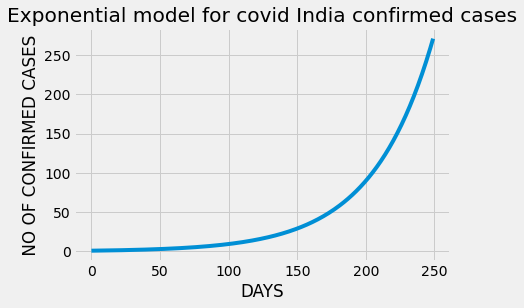

In [ ]:
days3=np.arange(0,250,1)
y_axis3=growth_rate**days3
y_axis3
plt.plot(days3,y_axis3)
plt.xlabel("DAYS")
plt.ylabel(" NO OF CONFIRMED CASES ")
plt.title("Exponential model for covid India confirmed cases")



# Visualization of spread of covid-19 across INDIA

In [ ]:
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

viz_ind_cov19
viz_plot_cov_ind = viz_ind_cov19.melt(id_vars="Date",value_vars=['Cured' ,	'Deaths' ,	'Confirmed' ,	'Active_cases'],var_name="problems",value_name="value")
viz_plot_cov_ind
fig4 = px.area(viz_plot_cov_ind, x="Date", y="value", color='problems',
             title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig4.update_layout(margin=dict(t=60,l=0,r=0,b=0))

# Bar plot visualization of covid-19 spread across india

In [ ]:
infect1=infect.reset_index()
infect1["Active"]=viz_ind_cov19.Active_cases
infect1

,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,Andaman and Nicobar Islands,1848286,27136,1938498,1
1,Andhra Pradesh,370426530,2939367,392432753,1
2,Arunachal Pradesh,6588149,26799,7176907,2
3,Assam,92678680,638323,99837011,3
4,Bihar,126525370,1112347,133662075,3
5,Cases being reassigned to states,0,0,345565,3
6,Chandigarh,10117035,147694,10858627,3
7,Chhattisgarh,151609364,2063920,163776262,3
8,Dadra and Nagar Haveli,20352,8,20722,3
9,Dadra and Nagar Haveli and Daman and Diu,1841750,1014,1938632,3


In [ ]:
pie_chart4 = px.pie(infect1, values = 'Cured', names = "State/UnionTerritory", title = "Recovered")
pie_chart4.update_traces(textposition = "inside")
pie_chart4.show()
pie_chart5 = px.pie(infect1, values = 'Deaths', names = "State/UnionTerritory", title = "Deaths")
pie_chart5.update_traces(textposition = "inside")
pie_chart5.show()
pie_chart6 = px.pie(infect1, values = 'Confirmed', names = "State/UnionTerritory", title = "Confirmed")
pie_chart6.update_traces(textposition = "inside")
pie_chart6.show()
pie_chart7= px.pie(infect1, values = 'Active', names = "State/UnionTerritory", title = "Active")
pie_chart7.update_traces(textposition = "inside")
pie_chart7.show()

# Mathematical model

1.0227499024566842 1831.3562315604331


Text(0.5, 0, 'No of days')

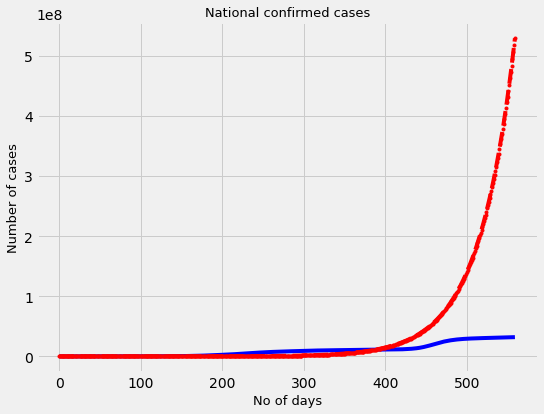

In [ ]:
print(growth_rate,initial)
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(x2.date, x2.Confirmed, 'b-')
ax1.plot(x2.date, np.exp(exp_n.fittedvalues), 'r--.')
ax1.set_title("National confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("No of days", size=13)


# Machine learning model

In [ ]:
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score


import random
import math
import time

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import operator

In [ ]:
plt.style.use('fivethirtyeight')
ml_dat=datan
ml_dat
confirmed_total_date = ml_dat.groupby('Date', as_index=False).agg({'Confirmed':'sum'})
fatalities_total_date = ml_dat.groupby('Date', as_index=False).agg({'Deaths':'sum'})
fatalities_total_date.head()

,Date,Deaths
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0


In [ ]:
confirmed_total_date.head()
confirmed_total_date.drop("Date",axis=1)


,Confirmed
0,1
1,1
2,2
3,3
4,3
...,...
555,31895385
556,31934455
557,31969954
558,31998158


In [ ]:
confirmed_total_date['Time'] = np.arange(0,len(confirmed_total_date),1)
x= confirmed_total_date['Time'].values.reshape(-1,1)
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
y = confirmed_total_date['Confirmed'].values.reshape(-1,1)
y



array([[       1],
       [       1],
       [       2],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       3],
       [       5],
       [       6],
       [      28],
       [      30],
       [      31],
       [      34],
       [      39],
       [      46],
       [      58],
       [      60],
       [      74],
       [      81],
       [      84],
       [     110],
       [     114],
       [     137],
       [     151],
       [     173],
       [     223],
       [     283],
       [    

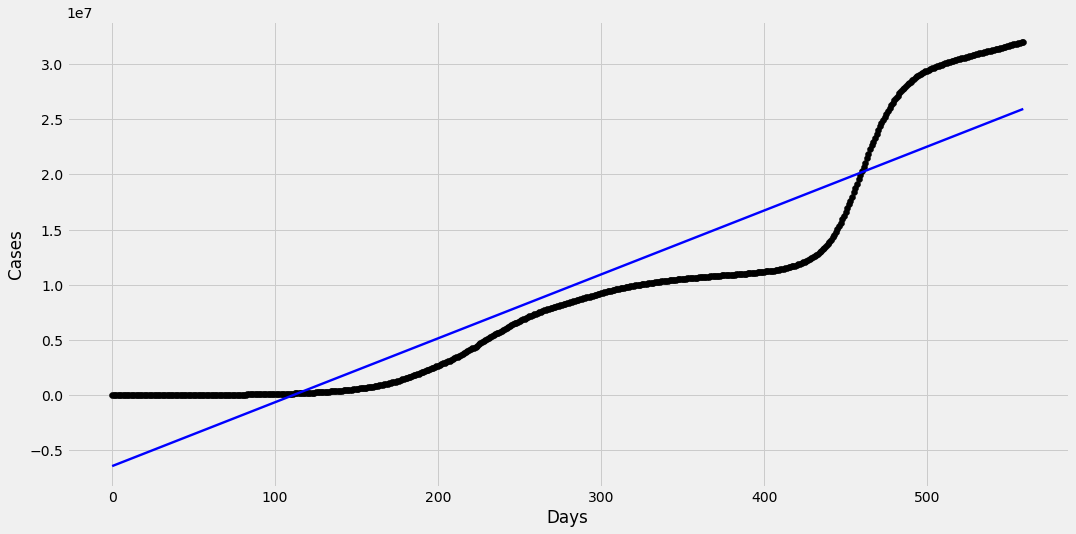

In [ ]:
reg = LinearRegression()
reg.fit(x,y)
pred = reg.predict(x)
plt.figure(figsize=(16, 8))
plt.scatter(x,y,c='black')
plt.plot(x,pred,c='blue',linewidth=2.4)
plt.xlabel("Days")
plt.ylabel("Cases")
plt.show()

In [ ]:
confirmed_total_date["LogConfirmed"] = np.log(confirmed_total_date.Confirmed)
confirmed_total_datey1 = confirmed_total_date.Confirmed
y2 = confirmed_total_date.LogConfirmed

In [ ]:
dates=confirmed_total_date.Date
days_in_future = 50
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-50]
adjusted_dates.shape

(560, 1)

In [ ]:
import datetime
start = '1/30/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(x,y, test_size=0.20, shuffle=False)
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)


In [ ]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)

test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 17331482.740640488
MSE: 334427248137330.94


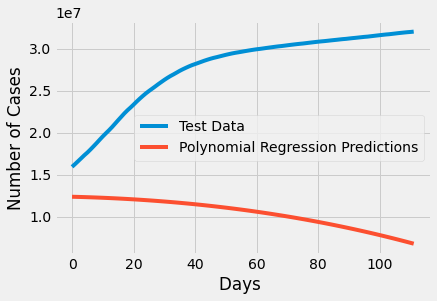

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.xlabel('Days ')
plt.ylabel('Number of Cases')
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [ ]:
def plt_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases in India Over Time', size=30)
    plt.xlabel('Days Since 1/30/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()


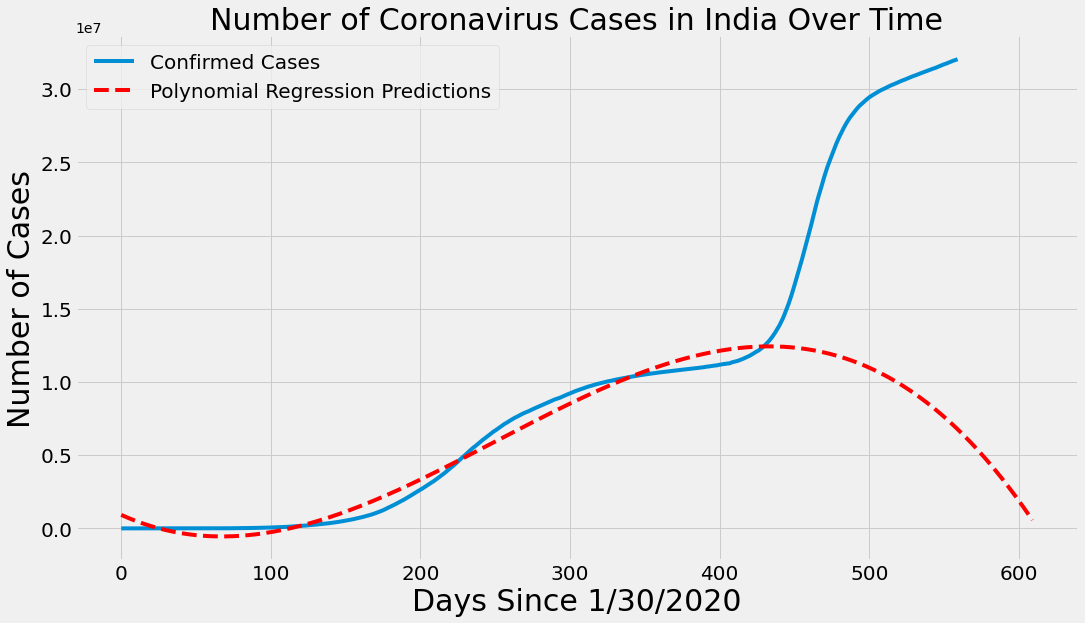

In [ ]:
plt_predictions(adjusted_dates, y, linear_pred, 'Polynomial Regression Predictions', 'red')